In [ ]:
from tqdm import tqdm
import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sympy import Polygon, Point
import cv2

In [ ]:
geometry_map = np.zeros([128,128, 8])

In [ ]:
def load_shapes_coords(annotation_path):

    """
    > TODO: Ensure and correct the clockwise order of the coords of a QUAD
    """

    quads_coords = pd.read_csv(annotation_path, header=None)
    quads_coords = quads_coords.iloc[:,:-1].values # [n_box, 8]
    quads_coords = quads_coords.reshape(-1, 4, 2)
    
    shapes_coords = quads_coords
    
    return shapes_coords

In [ ]:
shapes_coords = load_shapes_coords('/content/7.txt')
shapes_centre = shapes_coords.mean(axis=1).astype(np.int32)

In [ ]:
print(type(shapes_coords))
print(shapes_coords.shape)

<class 'numpy.ndarray'>
(0, 4, 2)


In [ ]:
for shape_coords, shape_centre in zip(shapes_coords, shapes_centre): 
  c_h, c_w = shape_centre
  
  geometry_map[c_h//4, c_w//4] = shape_coords.flatten() # [8]
geometry_map = geometry_map.reshape(-1, 8)

In [ ]:
for i in shapes_coords:
  print(i.flatten())

In [ ]:
print(geometry_map)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
len(geometry_map)

16384

In [ ]:
type()

In [ ]:
from PIL import Image


In [ ]:
image = Image.open('/content/353.jpg')

In [ ]:
image.size

(600, 450)

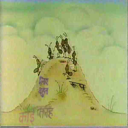

In [ ]:
image.resize((128,128))

In [ ]:
im = Image.open('/content/0.jpg')

In [ ]:
im.size

(600, 450)

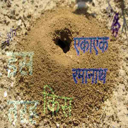

In [ ]:
im.resize((128,128))

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import psutil
from tqdm import tqdm_notebook
import cv2
import pickle
import time
import csv
np.random.seed(0)

In [ ]:
LANG = "hindi"
IMAGE_FOLDER = "/content/gdrive/MyDrive/data-dir/dev/images"
ANNOTATION_FOLDER = "/content/gdrive/MyDrive/data-dir/dev/annotations"
HEIGHT, WIDTH = 512, 512

In [ ]:
os.mkdir("/content/gdrive/MyDrive/data-dir/dev/images_formatted")
os.mkdir("/content/gdrive/MyDrive/data-dir/dev/annotations_formatted")

In [ ]:
NEW_IMAGE_FOLDER = "/content/gdrive/MyDrive/data-dir/dev/images_formatted"
NEW_ANNOTATION_FOLDER = "/content/gdrive/MyDrive/data-dir/dev/annotations_formatted"

In [ ]:
print(psutil.cpu_percent())
print(psutil.virtual_memory())

6.9
svmem(total=13653573632, available=12537688064, percent=8.2, used=836423680, free=7991455744, active=1347624960, inactive=3826577408, buffers=190091264, cached=4635602944, shared=1040384, slab=344633344)


In [ ]:
order = [0, 4, 1, 5, 2, 6, 3, 7]
for sub_folder in tqdm_notebook(os.listdir(IMAGE_FOLDER)):
    for image_file_name in tqdm_notebook(os.listdir(os.path.join(IMAGE_FOLDER, sub_folder))):
        key = os.path.join(sub_folder, image_file_name)
        with Image.open(os.path.join(IMAGE_FOLDER, sub_folder, image_file_name)) as pil_image:
            old_width, old_height = pil_image.size
            w_ratio = WIDTH / old_width
            h_ratio = HEIGHT / old_height
            pil_image = pil_image.resize((WIDTH, HEIGHT), Image.ANTIALIAS)
            src = os.path.join(IMAGE_FOLDER, sub_folder, image_file_name)
            dst = os.path.join(NEW_IMAGE_FOLDER, str(sub_folder)+"_"+image_file_name)
            #pil_image.save(src)
            #shutil.move(src, dst)
            pil_image.save(dst)
        annotation_file_name = image_file_name[:-3]+"txt"
        with open(os.path.join(ANNOTATION_FOLDER, sub_folder, annotation_file_name)) as annotation_file:
            lines = annotation_file.readlines()
            words = [line.split(" ")[-1].rstrip() for line in lines]
            lines = [line.split(" ")[:-1] for line in lines]
            lines = np.array(lines).astype(np.float)
            lines[:,0:4] = w_ratio * lines[:,0:4]
            lines[:,4:8] = h_ratio * lines[:,4:8]
            lines = lines.astype(np.int)
            lines = lines[:,order]
            lines = lines.tolist()
            lines = pd.DataFrame(lines)
            lines.insert(8, "text", words)
            src = os.path.join(ANNOTATION_FOLDER, sub_folder, annotation_file_name)
            dst = os.path.join(NEW_ANNOTATION_FOLDER, str(sub_folder)+"_"+annotation_file_name)[:-3] + "csv"
            lines.to_csv(dst, index=False, header=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
order = [0, 4, 1, 5, 2, 6, 3, 7]
for sub_folder in tqdm_notebook(os.listdir(IMAGE_FOLDER)):
    for image_file_name in tqdm_notebook(os.listdir(os.path.join(IMAGE_FOLDER, sub_folder))):
        key = os.path.join(sub_folder, image_file_name)
        with Image.open(os.path.join(IMAGE_FOLDER, sub_folder, image_file_name)) as pil_image:
            old_width, old_height = pil_image.size
            w_ratio = WIDTH / old_width
            h_ratio = HEIGHT / old_height
            pil_image = pil_image.resize((WIDTH, HEIGHT), Image.ANTIALIAS)
            src = os.path.join(IMAGE_FOLDER, sub_folder, image_file_name)
            dst = os.path.join(NEW_IMAGE_FOLDER, str(sub_folder)+"_"+image_file_name)
            #pil_image.save(src)
            #shutil.move(src, dst)
            pil_image.save(dst)
        annotation_file_name = image_file_name[:-3]+"txt"
        with open(os.path.join(ANNOTATION_FOLDER, sub_folder, annotation_file_name)) as annotation_file:
            lines = annotation_file.readlines()
            words = [line.split(" ")[-1].rstrip() for line in lines]
            lines = [line.split(" ")[:-1] for line in lines]
            lines = np.array(lines).astype(np.float)
            lines[:,0:4] = w_ratio * lines[:,0:4]
            lines[:,4:8] = h_ratio * lines[:,4:8]
            lines = lines.astype(np.int)
            lines = lines[:,order]
            lines = lines.tolist()
            lines = pd.DataFrame(lines)
            lines.insert(8, "text", words)
            src = os.path.join(ANNOTATION_FOLDER, sub_folder, annotation_file_name)
            dst = os.path.join(NEW_ANNOTATION_FOLDER, str(sub_folder)+"_"+annotation_file_name)[:-3] + "csv"
            lines.to_csv(dst, index=False, header=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until
